In [1]:
import numpy as np
import openpiv

from matplotlib import pyplot as plt

In [2]:
# this syhnthetic image pair has a velocity of 1.5 pxels.
# I do not remember the parameters of this image pair specifically
# as I lost the other pair over night.

def run_test():
    from openpiv import pyprocess as proc
    from openpiv import tools as piv_tls
    
    errors = {
        "windows":  [],
        "circular": [],
        "linear":   []
    }
    
    corr_methods = [
        "circular",
        "linear"
    ]
    
    real_disp = 1.5

    file = "test_{}.bmp"

    frame_a = piv_tls.imread(file.format('a'))
    frame_b = piv_tls.imread(file.format('b'))
        
        
    for i in range(12, 64):    
        window_size = i
        overlap = window_size // 2
        
        errors["windows"].append(window_size)
        
        for method in corr_methods: 
            n_rows, n_cols = proc.get_field_shape(
                frame_a.shape,
                window_size,
                overlap
            )
            
            aa = proc.moving_window_array(
                frame_a, 
                window_size, 
                overlap
            )
            
            bb = proc.moving_window_array(
                frame_b, 
                window_size, 
                overlap
            )
            
            corr = proc.fft_correlate_images(
                aa,
                bb,
                correlation_method=method,
                normalized_correlation=True
            )
            
            u, v = proc.vectorized_correlation_to_displacements(
                corr,
                n_rows,
                n_cols
            )

            err = real_disp - np.nanmean(np.hypot(u, v))
            errors[method].append(err)

    return errors

In [3]:
errors = run_test()

Found 1 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 1 bad peak(s)
Found 1 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)
Found 0 bad peak(s)


"\nplt.savefig(\n    'openpiv_int_window_test.jpeg',\n    dpi = 300\n)\n#"

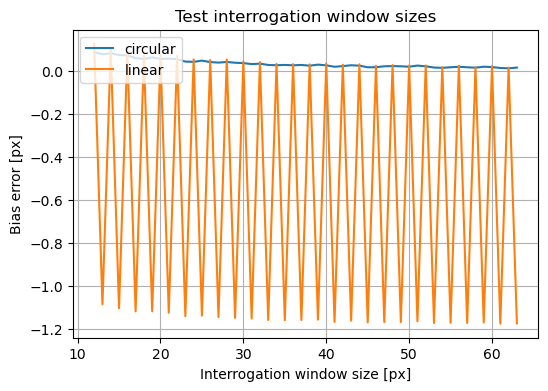

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

legend = []

ax.set_title('Test interrogation window sizes')
ax.set_ylabel('Bias error [px]')
ax.set_xlabel('Interrogation window size [px]')
ax.grid(True)


for err_key in ["circular", "linear"]:
    arr = np.array(errors[err_key])
    ax.plot(np.array(errors["windows"]), arr)
    legend.append(err_key)

ax.legend(
    legend,
    ncol = 1,
    loc = 'upper left'
)

'''
plt.savefig(
    'openpiv_int_window_test.jpeg',
    dpi = 300
)
#'''

Results are the same even for two different synthetic image pairs.